In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [87]:
df = pd.read_csv("metric_data.csv")
df = df.iloc[ : ,1: ]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
len(scaled_df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,119.780502,118.310265,120.530418,121.369156,124.230690,124.536598,126.204185,128.631546,131.236557,129.499893,...,130.279434,132.716690,132.381195,133.052170,131.345093,131.729935,130.190613,132.539078,132.933762,132.608139
1,118.310265,120.530418,121.369156,124.230690,124.536598,126.204185,128.631546,131.236557,129.499893,132.647614,...,132.716690,132.381195,133.052170,131.345093,131.729935,130.190613,132.539078,132.933762,132.608139,131.808884
2,120.530418,121.369156,124.230690,124.536598,126.204185,128.631546,131.236557,129.499893,132.647614,130.279434,...,132.381195,133.052170,131.345093,131.729935,130.190613,132.539078,132.933762,132.608139,131.808884,131.710190
3,121.369156,124.230690,124.536598,126.204185,128.631546,131.236557,129.499893,132.647614,130.279434,132.716690,...,133.052170,131.345093,131.729935,130.190613,132.539078,132.933762,132.608139,131.808884,131.710190,129.716995
4,124.230690,124.536598,126.204185,128.631546,131.236557,129.499893,132.647614,130.279434,132.716690,132.381195,...,131.345093,131.729935,130.190613,132.539078,132.933762,132.608139,131.808884,131.710190,129.716995,130.782639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,169.445618,169.355743,168.307190,167.218704,165.560989,173.330261,173.260345,171.532745,173.320267,173.510010,...,172.070007,172.070007,172.690002,175.050003,175.160004,174.199997,171.559998,171.839996,172.990005,175.429993
526,169.355743,168.307190,167.218704,165.560989,173.330261,173.260345,171.532745,173.320267,173.510010,172.570007,...,172.070007,172.690002,175.050003,175.160004,174.199997,171.559998,171.839996,172.990005,175.429993,177.300003
527,168.307190,167.218704,165.560989,173.330261,173.260345,171.532745,173.320267,173.510010,172.570007,172.070007,...,172.690002,175.050003,175.160004,174.199997,171.559998,171.839996,172.990005,175.429993,177.300003,177.250000
528,167.218704,165.560989,173.330261,173.260345,171.532745,173.320267,173.510010,172.570007,172.070007,172.070007,...,175.050003,175.160004,174.199997,171.559998,171.839996,172.990005,175.429993,177.300003,177.250000,180.089996


In [43]:
def lstm(X_train, y_train, X_test): 
  X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
  lstm = Sequential()
  lstm.add(LSTM(32, input_shape=(X_train.shape[1], 1), activation='relu',return_sequences=False))
  lstm.add(Dense(1))
  lstm.compile(loss='mean_squared_error', optimizer='adam')
  #lstm.summary()
  lstm.fit(X_train, y_train, epochs=10, batch_size=1)
  X_test_reshaped = X_test.reshape((1, len(X_test), 1))
  y_pred = lstm.predict(X_test_reshaped)
  print(y_pred)
  test = np.concatenate((X_test, y_pred[0]))
  test = test.reshape(-1, 1)
  test = test.T
  test = scaler.inverse_transform(test)
  return test[0][-1]

In [ ]:
prediction_list = []
for i in range(30):
  X_train = scaled_df[i:i+499, :20]
  y_train = scaled_df[i:i+499, -1]
  X_test = scaled_df[i+500, :20]
  y_pred = lstm(X_train, y_train, X_test)
  prediction_list.append(y_pred)
print(len(prediction_list))

In [45]:
prediction_list

[165.5839928199921,
 165.55001970635385,
 163.69973018470318,
 164.35162460618358,
 162.86328391961797,
 165.3750988479078,
 167.0870055717387,
 168.8314537282713,
 167.87244775938962,
 167.75713882678792,
 165.89751673486353,
 168.8843300038534,
 171.34692068634467,
 171.9104771967377,
 169.88522063338496,
 174.15099746894703,
 170.91297215512805,
 171.24945625335658,
 172.0990754040813,
 169.97438273796433,
 175.0369450793669,
 174.00151292689225,
 175.97769445188896,
 171.815837047483,
 171.91731231862832,
 171.81187594513995,
 172.00359685110197,
 176.83882389103655,
 174.62182510637285,
 182.17333455922017]

In [65]:
close_price = df.iloc[500: , 19]
close_price = list(close_price)
print(len(close_price))
true_price = df.iloc[500: , 20]
true_price = list(true_price)

30


In [86]:
def long_short(close_price, true_price, pred_price=prediction_list):
  return_rate = 1
  return_rate_list = []
  for i in range(len(pred_price)):
    #long 
    if close_price[i] < pred_price[i]: 
      return_rate *= 1+(true_price[i]-close_price[i])/close_price[i]
      print('long pred-close = ', pred_price[i] - close_price[i])
      print('.    true-close = ', true_price[i] - close_price[i])
    #short
    else: return_rate *= 1+(close_price[i]-true_price[i])/close_price[i]
    return_rate_list.append(return_rate)
  return return_rate_list

return_rate_long_short = long_short(close_price, true_price, pred_price=prediction_list)
print(return_rate_long_short)

long pred-close =  0.7579512249085383
.    true-close =  0.3095703125
long pred-close =  0.8078318815742023
.    true-close =  -0.0099945068359375
long pred-close =  0.5384346031551104
.    true-close =  -1.65771484375
long pred-close =  0.33652735498071706
.    true-close =  7.7692718505859375
long pred-close =  0.3777318354095769
.    true-close =  1.7875213623046875
long pred-close =  0.6409877033220255
.    true-close =  -0.94000244140625
long pred-close =  0.02906807986255444
.    true-close =  0.6199951171875
long pred-close =  1.7776975036467775
.    true-close =  -2.6399993896484375
long pred-close =  0.2558394888892508
.    true-close =  0.279998779296875
long pred-close =  0.07731598073769419
.    true-close =  1.1500091552734375
long pred-close =  2.083338221329541
.    true-close =  0.8600006103515625
[1.0097808753835331, 1.0116778003024904, 1.0212236672978063, 1.021161258161062, 0.9921651156995442, 0.9846831477994471, 0.9852054255539201, 0.9913052515396364, 0.9977162765744

In [77]:
def long_only(close_price, true_price, pred_price=prediction_list):
  return_rate = 1
  return_rate_list = []
  for i in range(len(pred_price)):
    #long 
    if close_price[i] < pred_price[i]: return_rate *= 1+(true_price[i]-close_price[i])/close_price[i]
    #short
    else: return_rate *= 1
    return_rate_list.append(return_rate)
  return return_rate_list

return_rate_long_only = long_only(close_price, true_price, pred_price=prediction_list)
print(return_rate_long_only)

[1, 1.001878551045282, 1.001878551045282, 1.0018173241294792, 1.0018173241294792, 1.0018173241294792, 1.0018173241294792, 1.0018173241294792, 1.0018173241294792, 0.9918858547005909, 1.0384320300936212, 1.0384320300936212, 1.0384320300936212, 1.0492534008656198, 1.0492534008656198, 1.043568998220494, 1.043568998220494, 1.043568998220494, 1.0473291403475635, 1.0473291403475635, 1.0473291403475635, 1.0473291403475635, 1.0314568766293264, 1.0331402915888943, 1.0400544025021237, 1.0400544025021237, 1.0400544025021237, 1.0400544025021237, 1.0400544025021237, 1.045021071607233]


In [73]:
def buy_stock(close_price, true_price):
  return_rate = 1
  return_rate_list = []
  for i in range(len(true_price)):
    return_rate *= 1+(true_price[i]-close_price[i])/close_price[i]
    return_rate_list.append(return_rate)
  return return_rate_list

return_rate_buy_stock = buy_stock(close_price, true_price)
print(return_rate_buy_stock)

[0.9902191246164668, 0.9920793017880731, 0.9827183599340135, 0.9826583039379861, 1.0105611448891703, 1.018181838186591, 1.017641792665063, 1.011341139329177, 1.0048005370748123, 0.9948394937031972, 1.0415242743585282, 1.0411041574519677, 1.0307231805508792, 1.041464218362501, 1.0426043654015844, 1.0369559843645357, 1.033951534169386, 1.033951534169386, 1.0376770230710377, 1.0518580316596868, 1.0525190143701615, 1.0467504296525145, 1.0308869362896649, 1.0325694210638654, 1.0394797115258363, 1.054141351459791, 1.065378057537861, 1.0650775941806374, 1.0821428492838383, 1.087310507287038]


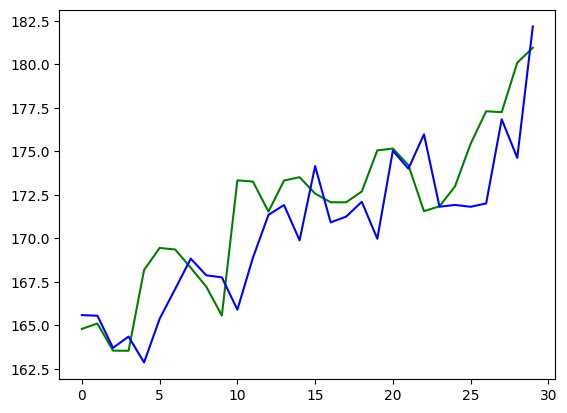

In [81]:
plt.plot(true_price, label='true value', color='green')
plt.plot(prediction_list, label='prediction', color='blue')


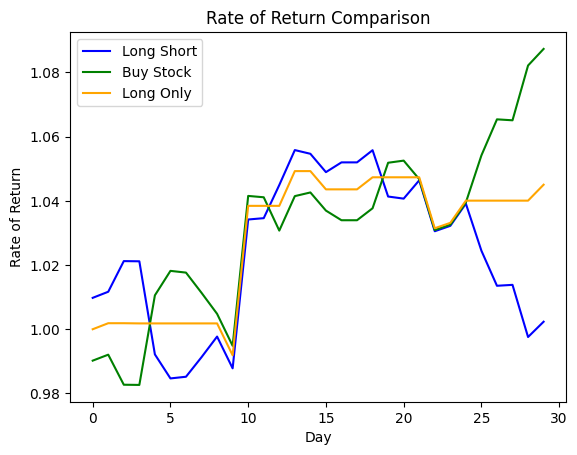

In [84]:
plt.plot(return_rate_long_short, label='Long Short', color='blue')
plt.plot(return_rate_buy_stock, label='Buy Stock', color='green')
plt.plot(return_rate_long_only, label='Long Only', color='orange')

# Add labels and title to the plot
plt.xlabel('Day')
plt.ylabel('Rate of Return')
plt.title('Rate of Return Comparison')

# Add a legend
plt.legend()

plt.show()

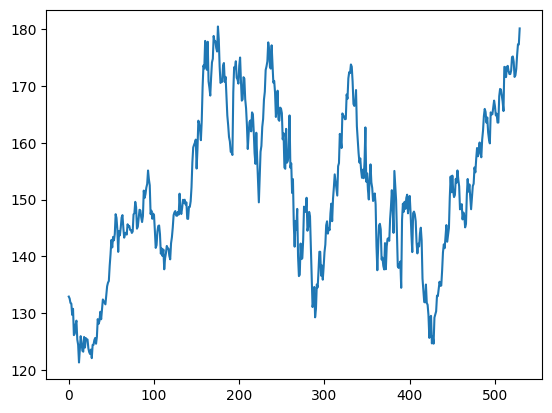

In [85]:
price = df.iloc[ : ,19]
plt.plot(price)